In [1]:
import json

import json

def calculate_accuracy(file_path):
    """
    :param file_path: the all_items.json under the checkpoint folder
    :return: a dictionary with the accuracy of each type
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)

    type_data = {}

    for entry in data:
        entry_type = entry['type']
        if entry_type not in type_data:
            type_data[entry_type] = {'total': 0, 'correct': 0}
        if entry['model_output'] == entry['target_text']:
            type_data[entry_type]['correct'] += 1
        type_data[entry_type]['total'] += 1

    results = {}
    for entry_type, stats in type_data.items():
        total = stats['total']
        correct = stats['correct']
        accuracy = (correct / total) * 100
        results[entry_type] = {
            'total': total,
            'correct': correct,
            'accuracy': f"{accuracy:.2f}%"
        }

    return results


In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap

def extract_checkpoints_and_plot_results(base_dir, calculate_accuracy, max_checkpoint=None, xlog=True):
    # get all checkpoint directories and sort them
    checkpoint_dirs = sorted(
        [d for d in os.listdir(base_dir) if d.startswith("checkpoint-")],
        key=lambda x: int(x.split('-')[1])
    )
    
    # get the all_items.json file path
    paths = []
    checkpoints = []
    for d in checkpoint_dirs:
        checkpoint_num = int(d.split('-')[1])
        if max_checkpoint is None or checkpoint_num <= max_checkpoint:
            paths.append(os.path.join(base_dir, d, "all_items.json"))
            checkpoints.append(checkpoint_num)

    # calculate accuracy for each checkpoint
    results_list = [calculate_accuracy(test_file_path) for test_file_path in paths]

    accuracy_dict = {}

    for results in results_list:
        for metric, values in results.items():
            if metric not in accuracy_dict:
                accuracy_dict[metric] = []
            accuracy_dict[metric].append(float(values['accuracy'].strip('%')))

    plt.figure(figsize=(10, 6))

    num_metrics = len(accuracy_dict)
    colormap = get_cmap("tab20")  # optional
    colors = [colormap(i / num_metrics) for i in range(num_metrics)]

    for idx, (metric, accuracies) in enumerate(accuracy_dict.items()):
        plt.plot(
            checkpoints,
            accuracies,
            label=f'{metric.capitalize()}',
            color=colors[idx],
            linestyle='-',
            linewidth=3
        )

    plt.title('Model Accuracies at Different Checkpoints')
    plt.xlabel('Checkpoints (Training Steps)')
    plt.ylabel('Accuracy (%)')

    if xlog:
        plt.xscale('log')
    else:
        plt.xticks(ticks=checkpoints)
    
    plt.ylim(0, 110)
    plt.grid(True)

    plt.legend()

    plt.tight_layout()
    plt.show()

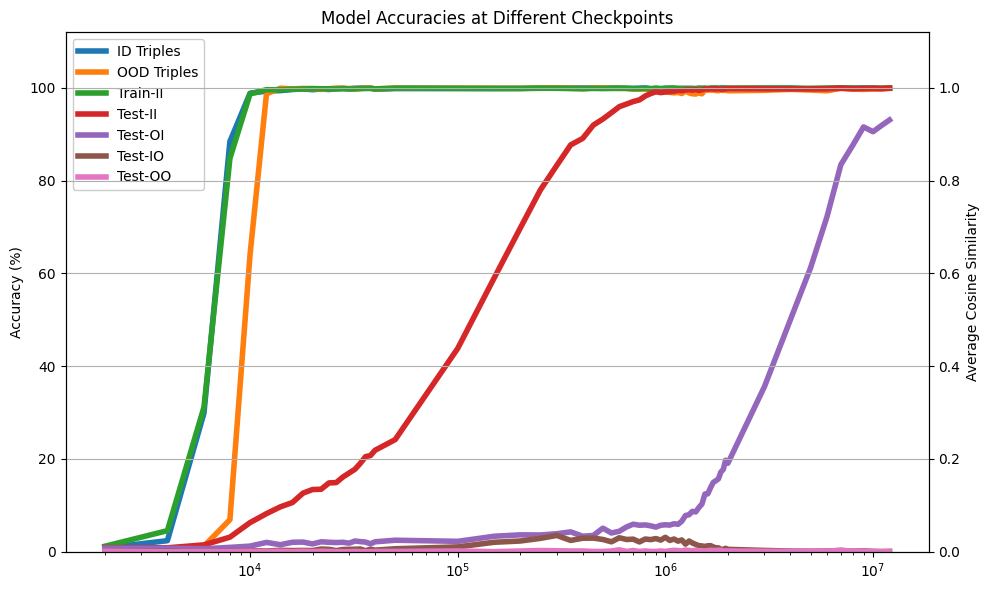

In [ ]:
base_dir = "/your/checkpoints/directory"  # replace with your directory
extract_checkpoints_and_plot_results(base_dir, calculate_accuracy)